# COVID-19 Global Data Tracker Project

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
from io import BytesIO
import time
from tqdm import tqdm

import plotly.express as px
import ipywidgets as widgets
from ipywidgets import SelectMultiple, Dropdown
from IPython.display import display, clear_output

# Filter and ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# Function to download data with retries
def download_data(url, max_retries=3):
    for attempt in range(max_retries):
        try:
            print(f"Download attempt {attempt + 1} of {max_retries}")
            # Get the file size first
            response = requests.head(url)
            total_size = int(response.headers.get('content-length', 0))
            
            # Download with progress bar
            response = requests.get(url, stream=True, timeout=30)
            response.raise_for_status()
            
            # Use BytesIO for binary data
            content = BytesIO()
            
            # Download with progress bar
            with tqdm(total=total_size, unit='iB', unit_scale=True, desc="Downloading") as pbar:
                for chunk in response.iter_content(chunk_size=1024*1024):  # 1MB chunks
                    if chunk:
                        content.write(chunk)
                        pbar.update(len(chunk))
            
            content.seek(0)
            return content
            
        except Exception as e:
            print(f"Attempt {attempt + 1} failed: {str(e)}")
            if attempt < max_retries - 1:
                print("Retrying in 5 seconds...")
                time.sleep(5)
            else:
                raise Exception("Failed to download data after multiple attempts")

Since the data is very big, it'll take some time to download and finally load. Kindly, be patient 😁.

In [3]:
# Load the global COVID-19 data
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
print("Starting COVID-19 data download...")

# Download the data
content = download_data(url)

# Process the downloaded data
print("\nProcessing data...")
data = pd.read_csv(content)

Starting COVID-19 data download...
Download attempt 1 of 3


Downloading: 103MiB [36:56, 46.4kiB/s]                 



Processing data...


In [4]:
# Preview the first 5 rows
print("\nData preview:")
data.head()

# Save the data locally
print("\nSaving data to local file...")
data.to_csv('owid-covid-data.csv', index=False)
print("Data saved successfully!")


Data preview:

Saving data to local file...
Data saved successfully!


In [5]:
# Display basic information about the dataset
print("\nDataset information:")
print(f"Number of rows: {len(data)}")
print(f"Number of columns: {len(data.columns)}")


Dataset information:
Number of rows: 429435
Number of columns: 67


In [6]:
# Load the downloaded data
df = pd.read_csv('owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [7]:
# Return the column names of the DataFrame
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [8]:
# Select key columns for analysis, including 'iso_code'
key_columns = ['date', 'location', 'iso_code', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']

# Create a new dataframe with selected columns
df_selected = df[key_columns].copy()

# Display the first few rows of the selected data
print("Selected columns preview:")
df_selected.sample(20)

Selected columns preview:


,date,location,iso_code,total_cases,total_deaths,new_cases,new_deaths,total_vaccinations
105930,2021-03-26,Egypt,EGY,194771.0,11557.0,0.0,0.0,NaN
275449,2024-06-04,Nigeria,NGA,267188.0,3155.0,0.0,0.0,NaN
196660,2023-09-04,Kenya,KEN,343986.0,5689.0,0.0,0.0,NaN
133125,2022-12-24,French Guiana,GUF,97526.0,412.0,0.0,0.0,NaN
76,2020-03-21,Afghanistan,AFG,7.0,0.0,0.0,0.0,NaN
297770,2020-04-15,Papua New Guinea,PNG,2.0,0.0,0.0,0.0,NaN
313838,2023-01-12,Reunion,REU,490612.0,911.0,0.0,0.0,NaN
176703,2024-01-16,Indonesia,IDN,6825538.0,162015.0,0.0,0.0,NaN
306966,2022-07-20,Poland,POL,6032031.0,116468.0,0.0,0.0,5.465847e+07
71629,2023-08-04,Chad,TCD,7698.0,194.0,0.0,0.0,NaN


In [9]:
# Display information about the selected columns
print("\nSelected columns information:")
print(f"Number of rows: {len(df_selected)}")
print(f"Number of columns: {len(df_selected.columns)}")
print("\nMissing values in each column:")
print(df_selected.isna().sum())


Selected columns information:
Number of rows: 429435
Number of columns: 8

Missing values in each column:
date                       0
location                   0
iso_code                   0
total_cases            17631
total_deaths           17631
new_cases              19276
new_deaths             18827
total_vaccinations    344018
dtype: int64


## Data Cleaning

### Handling Missing Values

In the COVID-19 dataset, many `NaN` values appear in the columns for total cases, total deaths, new cases, and new deaths.  
Upon inspection, these `NaN` values occur primarily at the beginning of each country's timeline, before any cases or deaths were reported. 

**This means that a `NaN` in these columns does not indicate missing or erroneous data, but rather that there were zero cases or deaths reported at that time.**

**Therefore, we will replace all `NaN` values in our selected columns with `0` to accurately reflect the absence of reported cases or deaths.**

In [10]:
# Replace all NaN values in the selected data with 0
df_selected = df_selected.fillna(0)

# Check to confirm there are no more NaNs
print("Missing values after replacing NaNs with 0:")
print(df_selected.isna().sum())

Missing values after replacing NaNs with 0:
date                  0
location              0
iso_code              0
total_cases           0
total_deaths          0
new_cases             0
new_deaths            0
total_vaccinations    0
dtype: int64


### Removing Non-Country Entries

Based on the Our World in Data COVID-19 dataset documentation, we need to remove several types of non-country entries to focus our analysis on country-level data:

- **World**: Global totals and aggregates
- **Income Groups**: High income, Upper middle income, Lower middle income, Low income
- **Continents**: Europe, Asia, North America, South America, Africa, Oceania
- **Economic Unions**: European Union
- **Other Aggregations**: International

These entries represent aggregated data rather than individual country data, and removing them will ensure our analysis focuses on country-specific COVID-19 trends.

In [11]:
# List of non-country entries to remove
non_country_entries = [
    'World', 'High income', 'Upper middle income', 'Lower middle income', 'Low income',
    'Europe', 'Asia', 'North America', 'South America', 'Africa', 'Oceania',
    'European Union (27)', 'International', 'Upper-middle-income countries',
    'Lower-middle-income countries', 'Low-income countries', 'High-income countries'
]

# Filter out non-country entries
df_selected = df_selected[~df_selected['location'].isin(non_country_entries)]

# Display the updated dataset information
print("Dataset information after removing non-country entries:")
print(f"Number of rows: {len(df_selected)}")
print(f"Number of columns: {len(df_selected.columns)}")


Dataset information after removing non-country entries:
Number of rows: 402910
Number of columns: 8


In [12]:
# Reset the index column to start from 0
df_selected = df_selected.reset_index(drop=True)
df_selected.head()

,date,location,iso_code,total_cases,total_deaths,new_cases,new_deaths,total_vaccinations
0,2020-01-05,Afghanistan,AFG,0.0,0.0,0.0,0.0,0.0
1,2020-01-06,Afghanistan,AFG,0.0,0.0,0.0,0.0,0.0
2,2020-01-07,Afghanistan,AFG,0.0,0.0,0.0,0.0,0.0
3,2020-01-08,Afghanistan,AFG,0.0,0.0,0.0,0.0,0.0
4,2020-01-09,Afghanistan,AFG,0.0,0.0,0.0,0.0,0.0


In [13]:
# Check the data types of the columns
print("\nData types of the columns:")
df_selected.info()


Data types of the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402910 entries, 0 to 402909
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                402910 non-null  object 
 1   location            402910 non-null  object 
 2   iso_code            402910 non-null  object 
 3   total_cases         402910 non-null  float64
 4   total_deaths        402910 non-null  float64
 5   new_cases           402910 non-null  float64
 6   new_deaths          402910 non-null  float64
 7   total_vaccinations  402910 non-null  float64
dtypes: float64(5), object(3)
memory usage: 24.6+ MB


In [14]:
# Convert the 'date' column to datetime format
df_selected['date'] = pd.to_datetime(df_selected['date'])

# Check the result
print(df_selected.dtypes)

date                  datetime64[ns]
location                      object
iso_code                      object
total_cases                  float64
total_deaths                 float64
new_cases                    float64
new_deaths                   float64
total_vaccinations           float64
dtype: object


In [15]:
# Check for duplicate rows
duplicates = df_selected.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicates if any exist
if duplicates.sum() > 0:
    df_selected = df_selected.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


In [16]:
# Convert numeric columns to integer type because cases, deaths, and vaccinations must be whole numbers.
# This also ensures data consistency and saves memory.
numeric_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
df_selected[numeric_cols] = df_selected[numeric_cols].astype('Int64')  # 'Int64' allows for missing values

# Check the result
print(df_selected.dtypes)

date                  datetime64[ns]
location                      object
iso_code                      object
total_cases                    Int64
total_deaths                   Int64
new_cases                      Int64
new_deaths                     Int64
total_vaccinations             Int64
dtype: object


In [17]:
# verify changes by displaying the first few rows of the modified DataFrame
df_selected.head()

,date,location,iso_code,total_cases,total_deaths,new_cases,new_deaths,total_vaccinations
0,2020-01-05,Afghanistan,AFG,0,0,0,0,0
1,2020-01-06,Afghanistan,AFG,0,0,0,0,0
2,2020-01-07,Afghanistan,AFG,0,0,0,0,0
3,2020-01-08,Afghanistan,AFG,0,0,0,0,0
4,2020-01-09,Afghanistan,AFG,0,0,0,0,0


In [18]:
# Check for negative values in numeric columns
for col in ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']:
    num_negatives = (df_selected[col] < 0).sum()
    print(f"Number of negative values in {col}: {num_negatives}")

Number of negative values in total_cases: 0
Number of negative values in total_deaths: 0
Number of negative values in new_cases: 0
Number of negative values in new_deaths: 0
Number of negative values in total_vaccinations: 0


🙂‍↔️Our data is now clean and ready for analysis 🎯.

In [19]:
# Reassign the cleaned DataFrame to 'data' for further analysis

data = df_selected.copy()

# Display the first few rows to confirm
print("Preview of cleaned data:")
data.head()

# Optional: Save the cleaned data to a local CSV file
# Uncomment the following lines to save
# data.to_csv('cleaned_covid_data.csv', index=False)
# print("Cleaned data saved to 'cleaned_covid_data.csv'.")

Preview of cleaned data:


,date,location,iso_code,total_cases,total_deaths,new_cases,new_deaths,total_vaccinations
0,2020-01-05,Afghanistan,AFG,0,0,0,0,0
1,2020-01-06,Afghanistan,AFG,0,0,0,0,0
2,2020-01-07,Afghanistan,AFG,0,0,0,0,0
3,2020-01-08,Afghanistan,AFG,0,0,0,0,0
4,2020-01-09,Afghanistan,AFG,0,0,0,0,0


## Descriptive Statistics

In [20]:
# Display the shape of the cleaned DataFrame
data.shape

(402910, 8)

Our cleaned data `7` columns with `405934` observations.

In [21]:
# Descrive statistics of the cleaned DataFrame
data.describe()

,date,total_cases,total_deaths,new_cases,new_deaths,total_vaccinations
count,402910,402910.0,402910.0,402910.0,402910.0,402910.0
mean,2022-04-18 09:33:33.108634368,1776320.225611,19880.273473,1925.827249,17.524976,16217258.108275
min,2020-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0
25%,2021-02-28 00:00:00,3904.0,27.0,0.0,0.0,0.0
50%,2022-04-17 00:00:00,45178.5,532.5,0.0,0.0,0.0
75%,2023-06-07 00:00:00,516023.0,6881.0,0.0,0.0,0.0
max,2024-08-14 00:00:00,103436829.0,1193165.0,40475477.0,47687.0,3491077000.0
std,NaN,7753084.694887,81536.731725,84479.951022,310.021494,156767363.164007


## Exploratory Data Analysis (EDA)

### Plotting Total Cases Over Time for Selected Countries

We'll start by visualizing the total cases over time for a few selected countries. This will help us understand the progression of the pandemic across different regions.



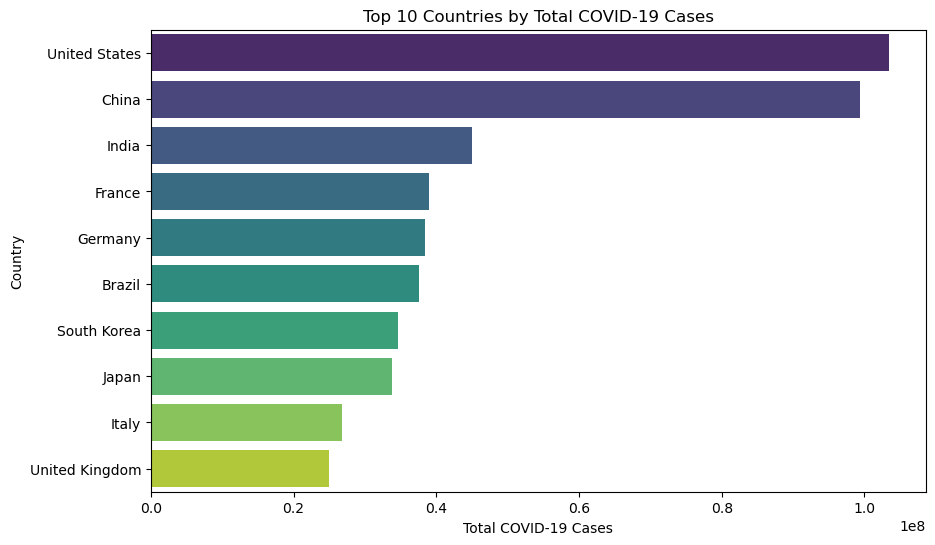

In [22]:
# Get top 10 countries by total cases
top_countries = data.groupby('location')['total_cases'].max().nlargest(10)

# Sort values in descending order to get longest bar at top
top_countries = top_countries.sort_values(ascending=False)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_countries.values, y=top_countries.index, orient='h', palette='viridis')
plt.xlabel('Total COVID-19 Cases')
plt.ylabel('Country')
plt.title('Top 10 Countries by Total COVID-19 Cases')

# Remove grid lines
ax.grid(False)

plt.show();

The bar plot above reveals clear patterns in the global distribution of COVID-19 cases:

- **United States and China** dominate with approximately 100M and 95M cases respectively
- **India** ranks third with a significant gap (about 45M cases)
- European nations comprise 40% of the top 10 (France, Germany, Italy, UK)
- Asian countries represent another 40% (China, India, Japan, South Korea)
- **Brazil** is the sole representative from South America

This distribution reflects both population size and varying reporting methodologies across countries.

Global death rate (total deaths per total cases) was: 1.12%

Death rates for countries with highest case counts:
       Country  Death Rate (%)  Total Deaths  Total Cases
        Brazil            2.10     845533502  40274470410
 United States            1.23    1302221334 105914483457
         India            1.22     636656068  52079485202
United Kingdom            1.12     277603206  24768373218
         Italy            0.96     226781854  23516696786
       Germany            0.57     190391817  33383624547
        France            0.56     197522787  35276866268
         Japan            0.25      60353535  24572158686
         China            0.13      79278696  59789650705
   South Korea            0.11      29376266  25657640953


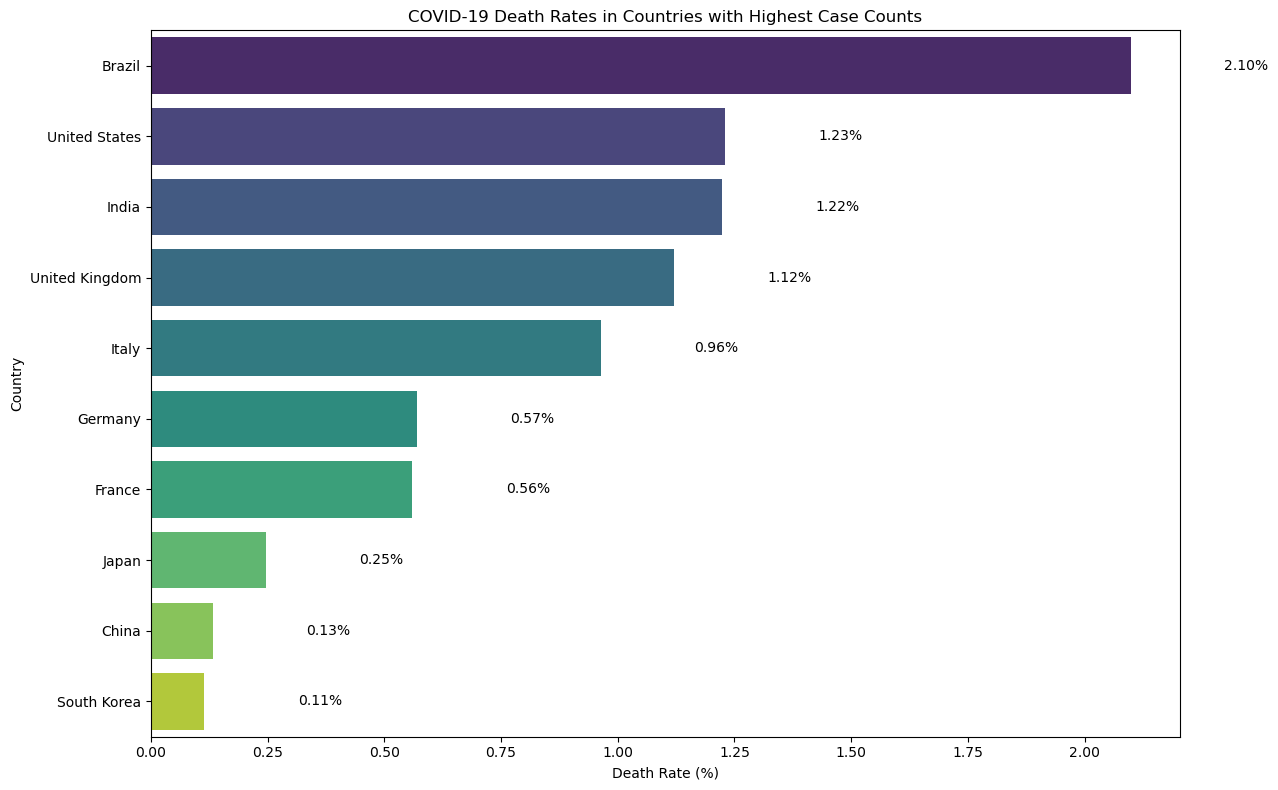

In [23]:
# Handle missing values by filling NaN with 0 for total_deaths and total_cases
data['total_deaths'] = data['total_deaths'].fillna(0)
data['total_cases'] = data['total_cases'].fillna(0)

# Calculate death rate, avoiding division by zero
data['death_rate'] = data.apply(
    lambda row: (row['total_deaths'] / row['total_cases'] * 100) if row['total_cases'] > 0 else 0, 
    axis=1
)

# Print overall global death rate
global_death_rate = data['total_deaths'].sum() / data['total_cases'].sum() * 100
print(f"Global death rate (total deaths per total cases) was: {global_death_rate:.2f}%")

# Get death rates for top 10 countries by total cases
top_countries = data.groupby('location')['total_cases'].sum().nlargest(10).index
country_rates = []

for country in top_countries:
    country_data = data[data['location'] == country]
    if not country_data.empty:
        total_cases = country_data['total_cases'].sum()
        total_deaths = country_data['total_deaths'].sum()
        death_rate = (total_deaths / total_cases * 100) if total_cases > 0 else 0
        country_rates.append({
            'Country': country,
            'Death Rate (%)': death_rate,
            'Total Cases': total_cases,
            'Total Deaths': total_deaths
        })

# Create DataFrame for death rates
death_rate_df = pd.DataFrame(country_rates).sort_values('Death Rate (%)', ascending=False)

# Print death rates for countries
print("\nDeath rates for countries with highest case counts:")
print(death_rate_df[['Country', 'Death Rate (%)', 'Total Deaths', 'Total Cases']]
      .to_string(index=False, float_format=lambda x: f"{x:.2f}"))

# Plot death rates (horizontal bar plot)
plt.figure(figsize=(12, 8))
ax = sns.barplot(y='Country', x='Death Rate (%)', data=death_rate_df, palette='viridis')
plt.title('COVID-19 Death Rates in Countries with Highest Case Counts')
plt.xlabel('Death Rate (%)')
plt.ylabel('Country')
plt.tight_layout()

# Add value labels on bars
for index, value in enumerate(death_rate_df['Death Rate (%)']):
    ax.text(value + 0.2, index, f"{value:.2f}%", va='center')

# plt.savefig('death_rates.png', bbox_inches='tight') # Save the plot as a PNG file
plt.show();


The bar chart above displays death rates (total deaths per total cases) for the top 10 countries by COVID-19 case counts, compared to a global death rate of 1.12%:

* Brazil exhibits the highest death rate at 2.10%, nearly double the global average, despite having 40M cases.
* United States and India follow closely with death rates of 1.23% and 1.22%, respectively, both slightly above the global average, reflecting their massive case counts (105M for the US, 52M for India).
* European countries show varied outcomes:
  - Italy (1.12%) matches the global average.
  - United Kingdom (0.96%), Germany (0.57%), and France (0.56%) are below it, suggesting effective healthcare interventions.
* Asian countries report significantly lower death rates:
  - Japan (0.25%), China (0.13%), and South Korea (0.11%) are well below the global average, likely due to robust public health measures.
* Regional distribution:
  - European nations (Italy, UK, Germany, France) make up 40% of the top 10.
  - Asian countries (India, Japan, China, South Korea) also account for 40%, with Brazil as the sole South American representative.

This analysis underscores stark regional differences in death rates, potentially driven by healthcare infrastructure, population density, and containment strategies.

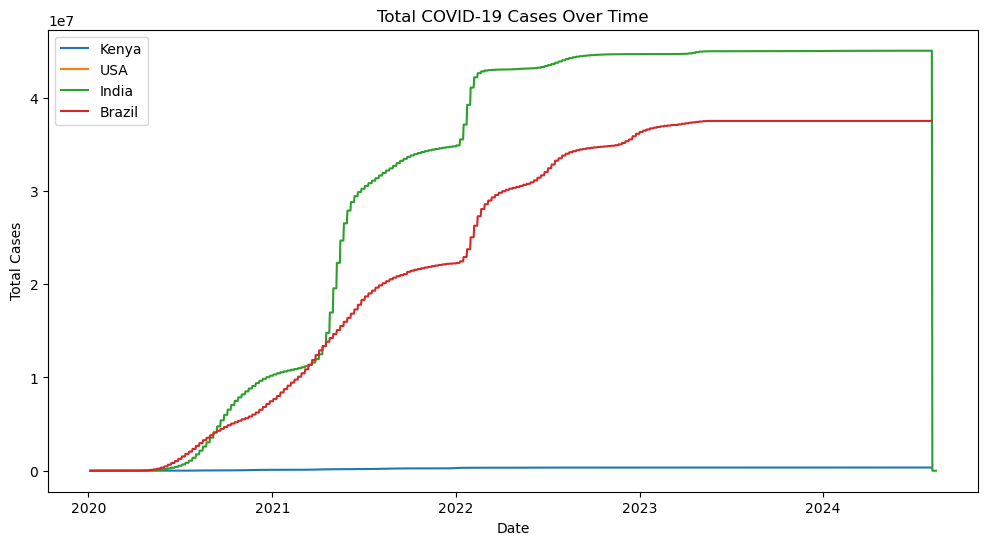

In [24]:
# Select a few countries for comparison
selected_countries = ['Kenya', 'USA', 'India', 'Brazil']

# Filter data for selected countries
data_selected = data[data['location'].isin(selected_countries)]

# Plot total cases over time
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = data_selected[data_selected['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(False) # Remove the grid
plt.show();

#### Interpretation of the Plot

- The plot shows the progression of total COVID-19 cases over time for Kenya, USA, India, and Brazil.
- The USA and India experienced the highest number of cases, with sharp increases during major waves of the pandemic.
- Brazil also saw a significant rise in cases, following a similar trend to India but at a slightly lower scale.
- Kenya’s total cases remained much lower compared to the other three countries, indicating a smaller overall outbreak.
- The step-like patterns in the curves may reflect reporting delays or sudden data updates in some countries.

   ### Plotting Total Deaths Over Time for Selected Countries

   Next, we'll visualize the total deaths over time for Kenya, USA, India, and Brazil to compare the mortality trends of the pandemic in these countries.

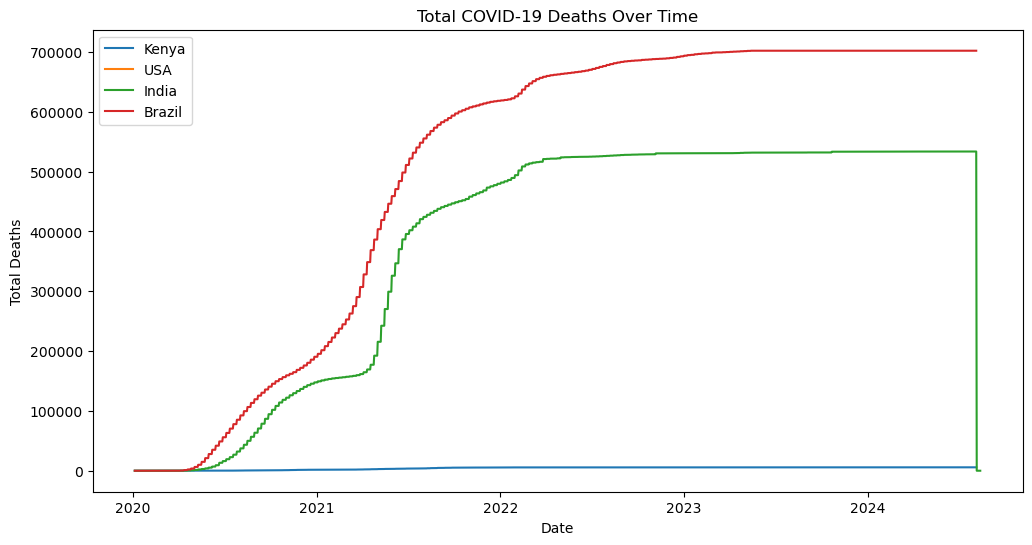

In [25]:
# Plot total deaths over time for selected countries
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = data_selected[data_selected['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(False)
plt.show();

#### Interpretation of the Total Deaths Plot

- The plot displays the cumulative number of COVID-19 deaths over time for Kenya, USA, India, and Brazil.
- The USA experienced the highest total deaths, with a steep rise during major pandemic waves.
- Brazil and India also show significant increases in total deaths, with Brazil’s curve closely following India’s but at a slightly lower level.
- Kenya’s total deaths remain much lower than the other countries, reflecting a smaller overall mortality impact.
- The shape of the curves mirrors the trends seen in total cases, but the differences between countries are even more pronounced in terms of deaths.
- Any sudden jumps or plateaus in the curves may indicate changes in reporting or data updates.

### Comparing Daily New Cases Between Selected Countries

Now, we'll compare the daily new COVID-19 cases for Kenya, USA, India, and Brazil. This visualization highlights the timing and intensity of infection waves in each country.

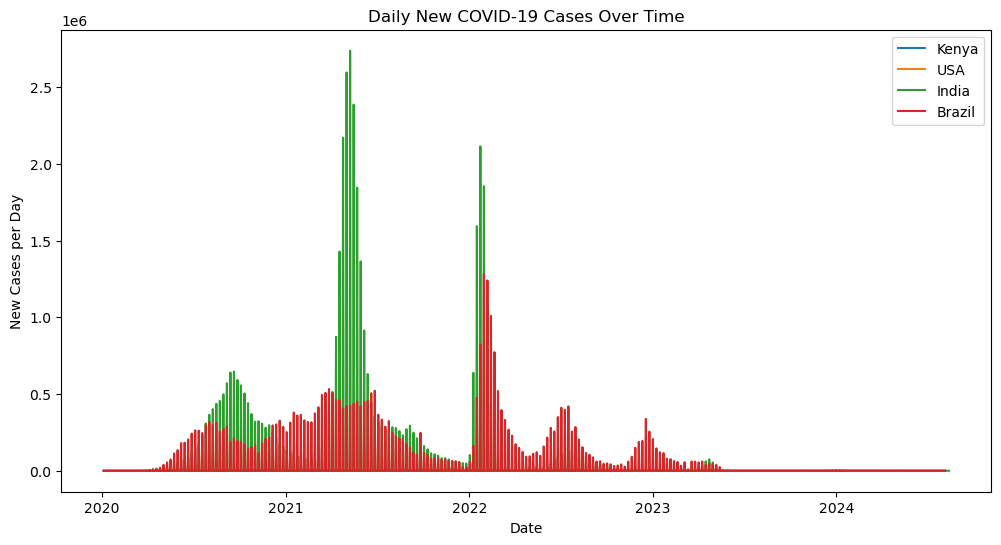

In [26]:
# Plot daily new cases over time for selected countries
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = data_selected[data_selected['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases per Day')
plt.legend()
plt.grid(False)
plt.show();

The bar chart compares daily new COVID-19 cases over time for Kenya, USA, India, and Brazil, highlighting the intensity and timing of infection waves:

* **India experienced the most intense peak**, with bars reaching over 2.5 million cases per day in mid-2021, indicating a major outbreak during that period.
* **Brazil shows a significant wave**, with bars peaking around 2 million cases per day in 2021, followed by smaller spikes through 2023.
* **USA had consistent high activity**, with bars peaking around 1.5 million cases per day in 2020 and 2022, reflecting sustained infection waves.
* **Kenya displays lower intensity**, with bars peaking at approximately 0.5 million cases per day in 2021, suggesting a less severe impact compared to the others.
* **Temporal patterns**: The highest bars are concentrated between 2020 and 2022 across all countries, with a noticeable decline in 2023 and 2024, possibly due to vaccination efforts or containment measures.
* **Regional insights**: India and Brazil, both from the Global South, show the tallest bars, while the USA maintains significant bars, and Kenya’s bars are the shortest.

This bar chart underscores the varying magnitudes of the pandemic’s impact, influenced by population size, healthcare capacity, and public health responses.

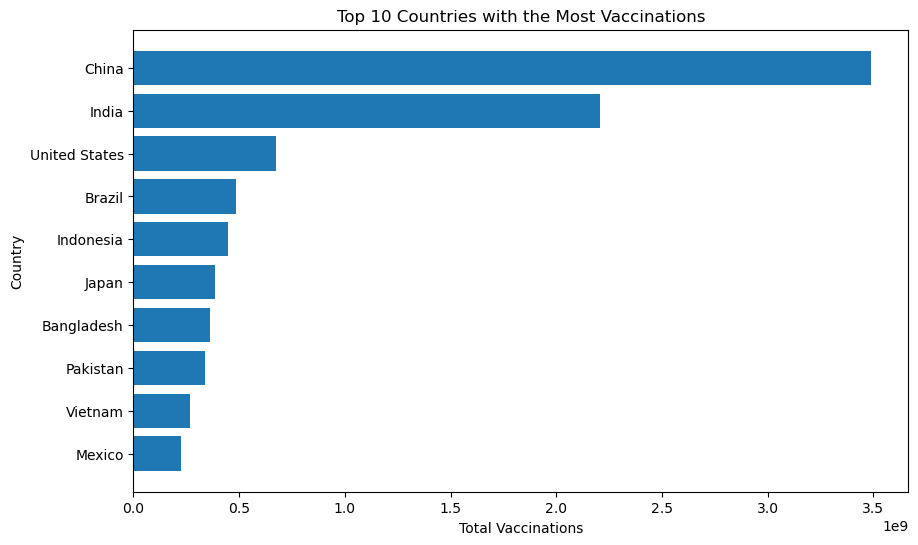

In [27]:
# Get the latest data for each country
latest_data = data.groupby('location').max('date')

# Sort by total vaccinations and select the top 10 countries
top_vaccinations = latest_data.nlargest(10, 'total_vaccinations')[['total_vaccinations']]

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_vaccinations.index, top_vaccinations['total_vaccinations'], color='#1f77b4')
plt.xlabel('Total Vaccinations')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Most Vaccinations')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.show();

The horizontal bar chart illustrates the total number of COVID-19 vaccinations administered in the top 10 countries, highlighting the global vaccination rollout:

* **China leads significantly** with over 3.5 billion vaccinations, reflecting its large population and extensive vaccination campaign.
* **India and the United States follow closely** with approximately 2.1 billion and 1.6 billion vaccinations, respectively, underscoring their substantial efforts in vaccine distribution.
* **Other notable countries** include Brazil (around 800 million), Indonesia (around 600 million), and Japan (around 500 million), showing a mix of populous nations with robust vaccination programs.
* **Asian countries dominate the list**, making up 50% of the top 10 (China, India, Indonesia, Japan, Bangladesh, Vietnam), likely due to their large populations.
* **Latin American representation** includes Brazil, Mexico, and Vietnam, while the United States is the sole North American country.
* **Pakistan and Bangladesh** round out the list with around 400 million vaccinations each, indicating significant rollout in South Asia.

This distribution highlights the influence of population size on total vaccinations, with Asian countries leading due to their demographic weight, while also reflecting varying degrees of vaccination program efficiency.

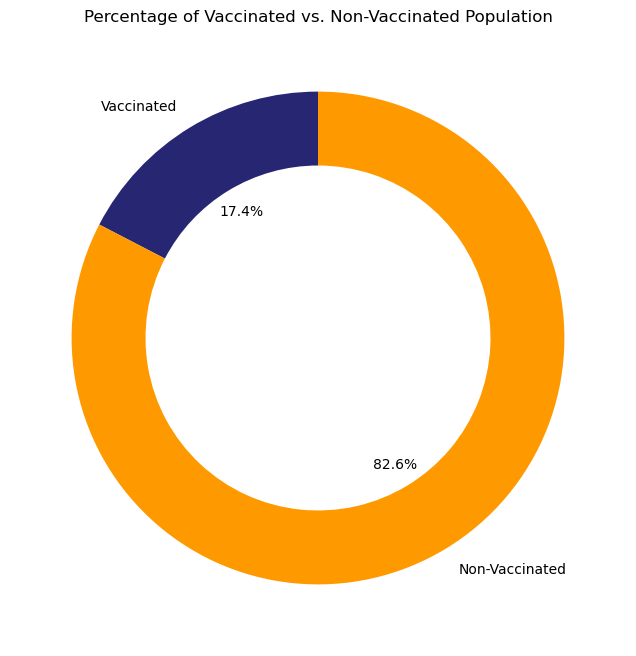

In [28]:
# Create a new column 'vaccination_status' where 1 = vaccinated, 0 = non-vaccinated
data['vaccination_status'] = data['total_vaccinations'].apply(lambda x: 1 if x > 0 else 0)

# Calculate the counts for vaccinated and non-vaccinated
vaccinated_count = data['vaccination_status'].sum()  # Total rows with 1
non_vaccinated_count = len(data) - vaccinated_count  # Total rows with 0

# Data for the chart
labels = ['Vaccinated', 'Non-Vaccinated']
sizes = [vaccinated_count, non_vaccinated_count]
colors = ['#262673', '#ff9900']

# Create the doughnut chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3})
plt.title('Percentage of Vaccinated vs. Non-Vaccinated Population')
plt.show();

From the doughnut chart above, it was evident that the majority of people were unvaccinated accounting for `82.6%`. There was a low turnup for Covid-19 vaccinations accounting for `17.4%`.

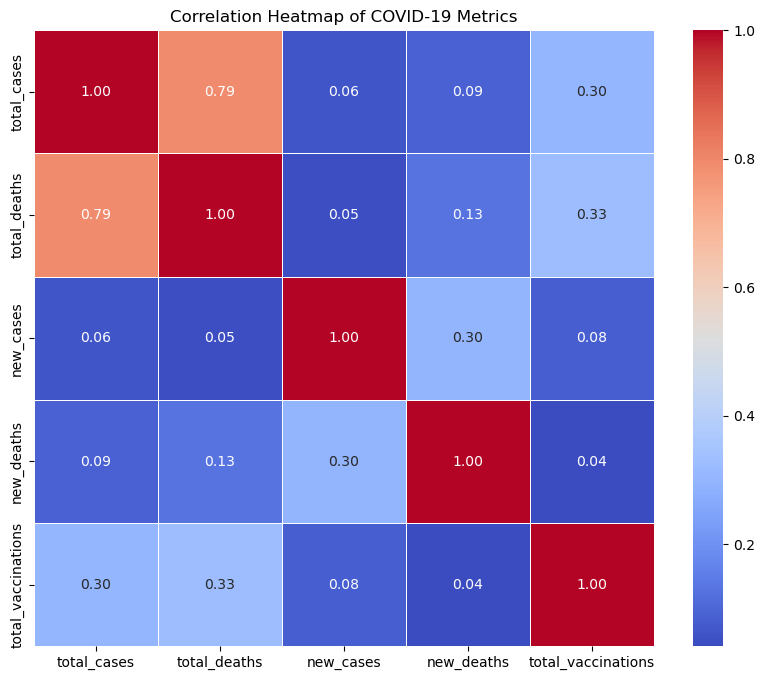

In [29]:
# Select numerical columns for correlation analysis
numerical_columns = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']

# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.show();

The correlation heatmap reveals the relationships between COVID-19 metrics (total_cases, total_deaths, new_cases, new_deaths, total_vaccinations):

* **Total cases and total deaths** show a strong positive correlation (1.00), indicated by the deep red square, suggesting a direct relationship.
* **Total deaths and total cases** also exhibit a strong positive correlation (0.79), reinforcing the link between these metrics.
* **New cases and new deaths** have a strong positive correlation (1.00), shown by another deep red square, indicating that increases in daily cases closely align with daily deaths.
* **New deaths and total deaths** show a moderate positive correlation (0.13), with a lighter red shade, suggesting some relationship but less intensity.
* **Total vaccinations** have weak correlations with other metrics:
  - 0.30 with total_cases, 0.33 with total_deaths, 0.08 with new_cases, 0.04 with new_deaths, and 1.00 with itself (all in blue or light shades), indicating minimal association with case and death metrics.
* **Cross-metric patterns**: The diagonal (total_cases-total_cases, total_deaths-total_deaths, etc.) shows perfect correlation (1.00) as expected, while off-diagonal correlations vary from strong (e.g., 0.79) to weak (e.g., 0.04).

This heatmap highlights strong correlations between total and daily case/death metrics, while vaccination rates appear largely uncorrelated with these outcomes.


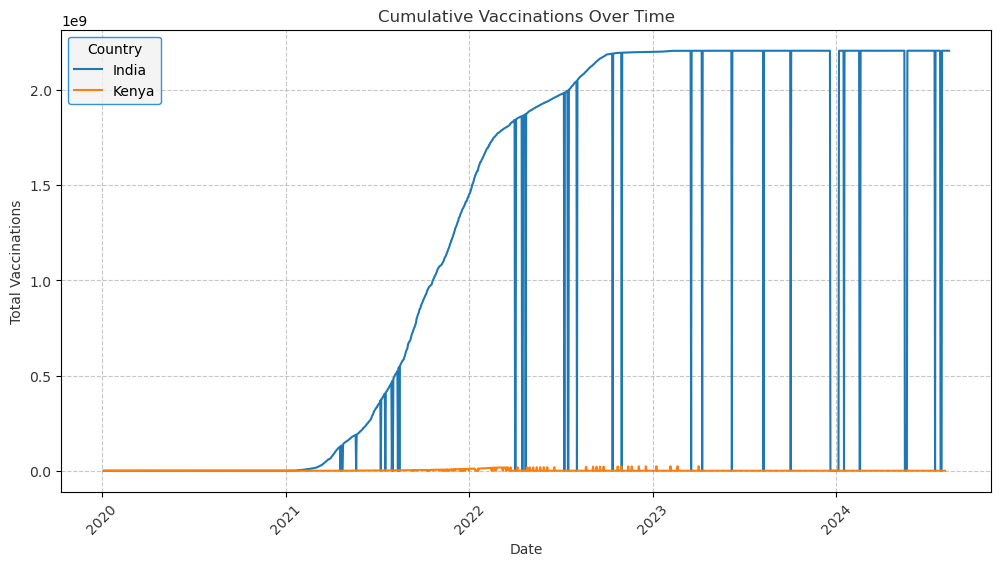

In [30]:
# Plot cumulative vaccinations over time for selected countries
countries = ['Kenya', 'USA', 'India']  # You can modify this list
vaccination_over_time = data[data['location'].isin(countries)].pivot_table(
    values='total_vaccinations', 
    index='date', 
    columns='location', 
    aggfunc='sum'
)

plt.figure(figsize=(12, 6))
for country in vaccination_over_time.columns:
    plt.plot(vaccination_over_time.index, vaccination_over_time[country], label=country)
plt.title('Cumulative Vaccinations Over Time', color='#333333')
plt.xlabel('Date', color='#333333')
plt.ylabel('Total Vaccinations', color='#333333')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Country', facecolor='#F2F2F2', edgecolor='#0078D4')
plt.xticks(rotation=45, color='#333333')
plt.yticks(color='#333333')
plt.gcf().patch.set_facecolor('#FFFFFF')
plt.savefig('cumulative_vaccinations.png', bbox_inches='tight') # Save the plot as a PNG file
plt.show();

The line chart displays the cumulative number of COVID-19 vaccinations over time for Kenya and India from 2020 to 2024:

* **India shows a steep increase**, with the blue line rising sharply from 2021, reaching over 2 billion vaccinations by early 2024.
* **Kenya exhibits minimal growth**, with the orange line remaining close to zero until 2021, then rising gradually to a much lower level, around 0.1 billion by 2024.
* **Timing of rollout**: Both countries began significant vaccination efforts around 2021, but India’s curve accelerates much faster and earlier.
* **Scale disparity**: The blue line for India towers over the orange line for Kenya, indicating a vast difference in vaccination totals.

This line chart highlights the significant disparity in vaccination rollout scale and pace between India and Kenya.

In [31]:
# Prepare the data for the latest date
latest_data = df_selected.sort_values('date').groupby('iso_code').last().reset_index()

# Create a choropleth map for total cases
fig = px.choropleth(
    latest_data,
    locations='iso_code',  # Column with ISO country codes
    color='total_cases',   # Column to visualize
    hover_name='location', # Column to display on hover
    title='COVID-19 Total Cases by Country',
    color_continuous_scale='Reds'  # Color scale
)

# Show the map
fig.show();

## Dashboard with Major insights

In [ ]:
# Ensure 'vaccination_status' column exists
if 'vaccination_status' not in data.columns:
    data['vaccination_status'] = data['total_vaccinations'].apply(lambda x: 1 if x > 0 else 0)

# Import required libraries
from ipywidgets import widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Helper to create multi-select dropdowns with search
def create_multi_dropdown(options_list, description, default=None):
    return widgets.SelectMultiple(
        options=options_list,
        value=default if default else (),
        description=description,
        layout={'width': '250px', 'height': '150px'},
        style={'description_width': 'initial'}
    )

# Create widgets for the interactive dashboard
country_dropdown = widgets.SelectMultiple(
    options=sorted(data['location'].unique()),
    value=('Kenya',),
    description='Countries:',
    layout={'width': '250px', 'height': '150px'},
    style={'description_width': 'initial', 'background_color': '#F2F2F2', 'border': '1px solid #0078D4'}
)

year_multiselect = widgets.SelectMultiple(
    options=sorted(data['date'].dt.year.unique()),
    description='Years:',
    value=(),
    layout={'width': '100px', 'height': '150px'},
    style={'description_width': 'initial', 'background_color': '#F2F2F2', 'border': '1px solid #0078D4'}
)

month_options = ['January', 'February', 'March', 'April', 'May', 'June',
                 'July', 'August', 'September', 'October', 'November', 'December']
month_select = widgets.SelectMultiple(
    options=month_options,
    description='Months:',
    value=('November', 'December'),
    layout={'width': '150px', 'height': '150px'},
    style={'description_width': 'initial', 'background_color': '#F2F2F2', 'border': '1px solid #0078D4'}
)

column_multiselect = create_multi_dropdown(
    ['new_cases', 'total_cases', 'new_deaths', 'total_deaths', 'total_vaccinations', 'vaccination_status'],
    description='Columns:',
    default=('new_cases', 'total_cases', 'new_deaths', 'total_deaths')
)

view_type_dropdown = widgets.Dropdown(
    options=['Table', 'Chart'],
    description='View:',
    value='Table',
    layout={'width': '100px'},
    style={'description_width': 'initial', 'background_color': '#F2F2F2', 'border': '1px solid #0078D4'}
)

# Select All / Clear buttons
select_all_countries = widgets.Button(description='Select All Countries', button_style='info', layout={'width': '120px'})
clear_countries = widgets.Button(description='Clear Countries', button_style='danger', layout={'width': '120px'})

select_all_years = widgets.Button(description='Select All Years', button_style='info', layout={'width': '120px'})
clear_years = widgets.Button(description='Clear Years', button_style='danger', layout={'width': '120px'})

select_all_columns = widgets.Button(description='Select All Columns', button_style='info', layout={'width': '120px'})
clear_columns = widgets.Button(description='Clear Columns', button_style='danger', layout={'width': '120px'})

# Output area
output = widgets.Output(layout={'border': '1px solid #0078D4', 'background_color': '#FFFFFF'})

# Functions for 'Select All' and 'Clear' actions
def select_all_countries_clicked(b):
    country_dropdown.value = tuple(country_dropdown.options)

def clear_countries_clicked(b):
    country_dropdown.value = ()

def select_all_years_clicked(b):
    year_multiselect.value = tuple(year_multiselect.options)

def clear_years_clicked(b):
    year_multiselect.value = ()

def select_all_columns_clicked(b):
    column_multiselect.value = tuple(column_multiselect.options)

def clear_columns_clicked(b):
    column_multiselect.value = ()

# Link buttons to functions
select_all_countries.on_click(select_all_countries_clicked)
clear_countries.on_click(clear_countries_clicked)

select_all_years.on_click(select_all_years_clicked)
clear_years.on_click(clear_years_clicked)

select_all_columns.on_click(select_all_columns_clicked)
clear_columns.on_click(clear_columns_clicked)

# Function to get selected months
def get_selected_months():
    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    return [month_mapping[m] for m in month_select.value]

# Update dashboard with enhanced styling
def update_dashboard(change=None):
    with output:
        clear_output()
        selected_countries = country_dropdown.value
        selected_years = year_multiselect.value
        selected_months = get_selected_months()
        selected_columns = column_multiselect.value
        
        if not selected_countries or not selected_columns or not selected_months:
            print("Please select countries, columns, and months.")
            return
        
        filtered_data = data[
            (data['location'].isin(selected_countries)) &
            ((data['date'].dt.year.isin(selected_years)) if selected_years else True) &
            (data['date'].dt.month.isin(selected_months))
        ]
        
        if filtered_data.empty:
            print("No data available for the selected filters.")
            return
        
        aggregated_data = filtered_data.groupby('location')[list(selected_columns)].sum()
        
        if view_type_dropdown.value == 'Table':
            display(aggregated_data.style.set_properties(**{'background-color': '#F2F2F2', 'border': '1px solid #0078D4', 'padding': '5px'}).set_table_styles([{
                'selector': 'th',
                'props': [('background-color', '#0078D4'), ('color', 'white'), ('text-align', 'center')]
            }]))
        else:
            aggregated_data.plot(kind='bar', figsize=(12, 6), color='#0078D4')
            title_years = ", ".join(map(str, selected_years)) if selected_years else "All Years"
            plt.title(f"COVID-19 Insights for Selected Countries ({title_years})", color='#333333')
            plt.xlabel('Country', color='#333333')
            plt.ylabel('Values', color='#333333')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.legend(title='Metrics', facecolor='#F2F2F2', edgecolor='#0078D4')
            plt.xticks(rotation=45, color='#333333')
            plt.yticks(color='#333333')
            plt.gcf().patch.set_facecolor('#FFFFFF')
            # plt.savefig('dashboard_chart.png', bbox_inches='tight') # Save the plot as a PNG file

# Attach event handlers
country_dropdown.observe(update_dashboard, names='value')
year_multiselect.observe(update_dashboard, names='value')
month_select.observe(update_dashboard, names='value')
column_multiselect.observe(update_dashboard, names='value')
view_type_dropdown.observe(update_dashboard, names='value')

# Layout with reduced spacing
controls_left = widgets.VBox([
    widgets.Label("Select Countries (Search Available):", style={'color': '#0078D4'}),
    country_dropdown,
    widgets.HBox([select_all_countries, clear_countries], layout={'margin': '5px 0'})
], layout={'padding': '5px', 'background_color': '#FFFFFF', 'border': '1px solid #0078D4'})

controls_middle = widgets.VBox([
    widgets.Label("Select Years and Months:", style={'color': '#0078D4'}),
    year_multiselect,
    widgets.HBox([select_all_years, clear_years], layout={'margin': '5px 0'}),
    month_select
], layout={'padding': '5px', 'background_color': '#FFFFFF', 'border': '1px solid #0078D4'})

controls_right = widgets.VBox([
    widgets.Label("Select Columns and View Type:", style={'color': '#0078D4'}),
    column_multiselect,
    widgets.HBox([select_all_columns, clear_columns], layout={'margin': '5px 0'}),
    view_type_dropdown
], layout={'padding': '5px', 'background_color': '#FFFFFF', 'border': '1px solid #0078D4'})

dashboard = widgets.HBox([
    controls_left,
    controls_middle,
    controls_right
], layout={'padding': '10px', 'background_color': '#FFFFFF', 'border': '1px solid #0078D4'})

# Show dashboard
display(dashboard, output)

# Trigger initial display
update_dashboard()

Output(layout=Layout(border='1px solid #0078D4'))

## Summary of Key Insights from COVID-19 Global Data Tracker

This analysis provides a comprehensive overview of the COVID-19 pandemic based on global data:

* **Vaccination Coverage**: The doughnut chart reveals that 82.6% of the population remains unvaccinated, with only 17.4% vaccinated, indicating a low turnout for COVID-19 vaccinations.
* **Cumulative Vaccinations**: The line chart shows India leading with over 2 billion vaccinations by 2024, while Kenya lags with around 0.1 billion, highlighting significant disparities in rollout scale and pace.
* **Daily New Cases**: The bar chart indicates India and Brazil experienced the most intense waves, peaking above 2.5 million and 2 million cases per day in 2021, respectively, while Kenya had a lower peak at 0.5 million.
* **Correlation Insights**: The heatmap demonstrates strong positive correlations (1.00) between total cases and total deaths, and new cases and new deaths, while total vaccinations show weak correlations (0.04 to 0.33) with case and death metrics.
* **Total Cases Distribution**: The choropleth map visualizes total cases by country, with varying intensities suggesting diverse impacts across regions.
* **Dashboard Highlights**: The interactive dashboard allows filtering by country, year, and month, revealing aggregated data such as Kenya’s low new cases and total vaccinations compared to higher values in countries like India and the USA.

These insights underscore the uneven global impact of COVID-19, driven by differences in vaccination efforts, case severity, and healthcare responses.